In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
df = pd.read_csv(r"D:\AI\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

## 2. Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## 3. Data Cleaning

In [11]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# check for duplicates
df.duplicated().sum()

0

In [13]:
# drop unwanted rows
df.drop(['RowNumber',"CustomerId",'Surname'],axis=1,inplace=True)

In [14]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 4. Feature Engineering
#### Feature Selection

###### Correlation Analysis

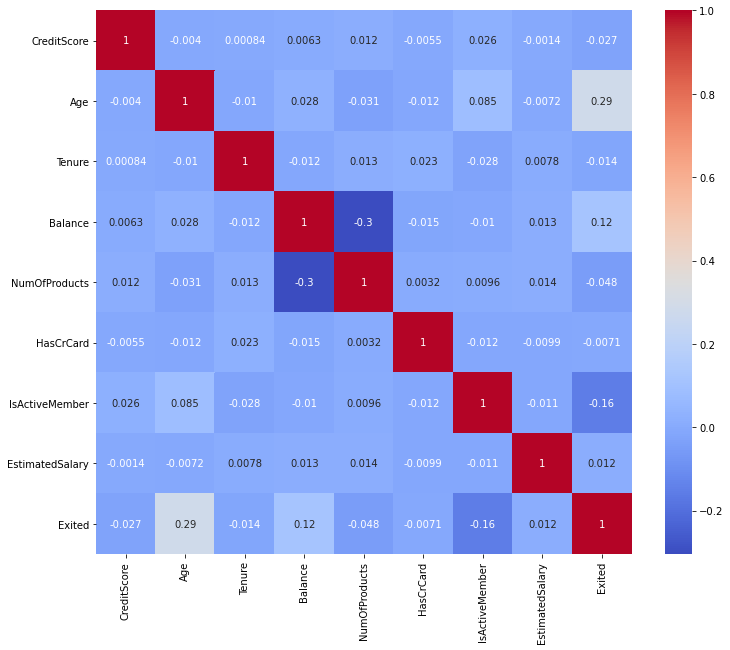

In [15]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

##### ANOVA - analysis of variance - F Test
    - it is used to compare the distributin of a variable in two or more groups
    - for example - comparing distribution of age of customers for groups exited = 1 & exited = 0
    
- Ho = Null Hypothesis = distribution of variable in two/more groups is uniform
- Ha = Alternate Hypothesis = distribution of the variable in two/more groups in not uniform

We always analyse the pvalue, consider for 95% confidence interval, signifcance = 5% = 0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [17]:
numerics = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
xnum = df[numerics]
y = df['Exited']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


###### Chi Sqaure Test
    - Used to compare the distribution of categories of a categorical feature in two or more groups
    - in nutshell to compare whether a categorical attribute has some relationship with the other categorical attribute
    
- H0 = Null Hypothesis = the categorical attribute has uniform distribution in two or more groups
- Ha = Alternate hypothesis = the categorical attribute has different distribution in two or more groups

We always analyse the pvalue, consider 95% as confidence interval, significance level = 5% i.e.0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [20]:
categories = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xcat = df[categories]
y = df['Exited']
from sklearn.preprocessing import LabelEncoder
xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])
xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
from sklearn.feature_selection import chi2
chival,pval = chi2(xcat,y)
for i in range(len(categories)):print(categories[i],pval[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.568036240543455e-27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [22]:
# selecting important features
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']
print(x.shape)
print(y.shape)

(10000, 7)
(10000,)


## 5. Preprocessing

In [29]:
x.head(10)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0
8,501,France,Male,44,142051.07,2,1
9,684,France,Male,27,134603.88,1,1


In [36]:
# onehot encoding for features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2])],remainder='passthrough')

In [37]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head(10)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,619.0,42.0,0.00,1.0,1.0
1,0.0,1.0,0.0,608.0,41.0,83807.86,1.0,1.0
2,0.0,0.0,0.0,502.0,42.0,159660.80,3.0,0.0
3,0.0,0.0,0.0,699.0,39.0,0.00,2.0,0.0
4,0.0,1.0,0.0,850.0,43.0,125510.82,1.0,1.0
5,0.0,1.0,1.0,645.0,44.0,113755.78,2.0,0.0
6,0.0,0.0,1.0,822.0,50.0,0.00,2.0,1.0
7,1.0,0.0,0.0,376.0,29.0,115046.74,4.0,0.0
8,0.0,0.0,1.0,501.0,44.0,142051.07,2.0,1.0
9,0.0,0.0,1.0,684.0,27.0,134603.88,1.0,1.0
